In [2]:
# -*- coding: utf-8 -*-
"""Spike2TS.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/16Etn1okt8z1194ampx_c0-xHGvJF74o1
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
# from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean


import itertools
from itertools import product

import csv

from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit

from sklearn.decomposition import KernelPCA

import timeit

import random
import matplotlib.pyplot as plt

from sklearn.metrics import *
import sys
# sys.stdout = open('./output_spike2ts.txt', 'w')

from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

print("Packages Loading done!!")


Packages Loading done!!


In [3]:
seq_data = np.load("E:/RA/IJCAI/Dataset/Original/first_kmers_freq_vec_seq_data_7000.npy",allow_pickle=True)
attribute_data = np.load("E:/RA/IJCAI/Dataset/Original/seq_data_variant_names_7000.npy",allow_pickle=True)

In [4]:
# attr_kmers = np.load("E:/RA/IJCAI/Dataset/Original/second_seq_data_variant_names_7000.npy")
attribute_data = np.load("E:/RA/IJCAI/Dataset/Original/seq_data_variant_names_7000.npy",allow_pickle=True)
unique_hst = list(np.unique(attribute_data))

int_hosts = []
for ind_unique in range(len(attribute_data)):
    variant_tmp = attribute_data[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

Attribute data preprocessing Done


In [5]:
number_of_NN = 20
A = kneighbors_graph(seq_data, number_of_NN, mode='connectivity', include_self=False)

In [6]:
adj_mat = A.toarray()
sum(adj_mat[0])

20.0

In [7]:
edge_list_first = [0]*140000
edge_list_second = [0]*140000

counter = 0
for i in range(0,7000):
    my_list = adj_mat[i]
    indices = [i for i, x in enumerate(my_list) if x == 1]
    for j in range(len(indices)):
        edge_list_first[counter] = i
        edge_list_second[counter] = indices[j]
        counter = counter+1

In [9]:
np.save("E:/University/3rd Semester/Graph Mining/Project/Code/graph_nets-master/DeepWalk/first_edgelist.npy",edge_list_first)
np.save("E:/University/3rd Semester/Graph Mining/Project/Code/graph_nets-master/DeepWalk/second_edgelist.npy",edge_list_second)

In [208]:
import csv
# with open('E:/University/3rd Semester/Graph Mining/Project/Plots/Data/edge_list.csv', 'w', newline='') as csvfile:
#     spamwriter = csv.writer(csvfile, delimiter=' ',
#                             quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     spamwriter.writerow(edge_list_first)
    
with open('E:/University/3rd Semester/Graph Mining/Project/Plots/Data/edge_list_2.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for word in edge_list_second:
        wr.writerow([word])

In [54]:
import xlsxwriter     
      
book = xlsxwriter.Book('E:/University/3rd Semester/Graph Mining/Project/Plots/Data/data_adjacency_list.xlsx')     
sheet = book.add_sheet()     
       
# Rows and columns are zero indexed.     
row = 0    
column = 0    

for item in adj_mat_values :     
      
    # write operation perform     
    sheet.write(row, column, item)     
      
    # incrementing the value of row by one with each iterations.     
    row += 1    
          
book.close()  

AttributeError: module 'xlsxwriter' has no attribute 'Book'

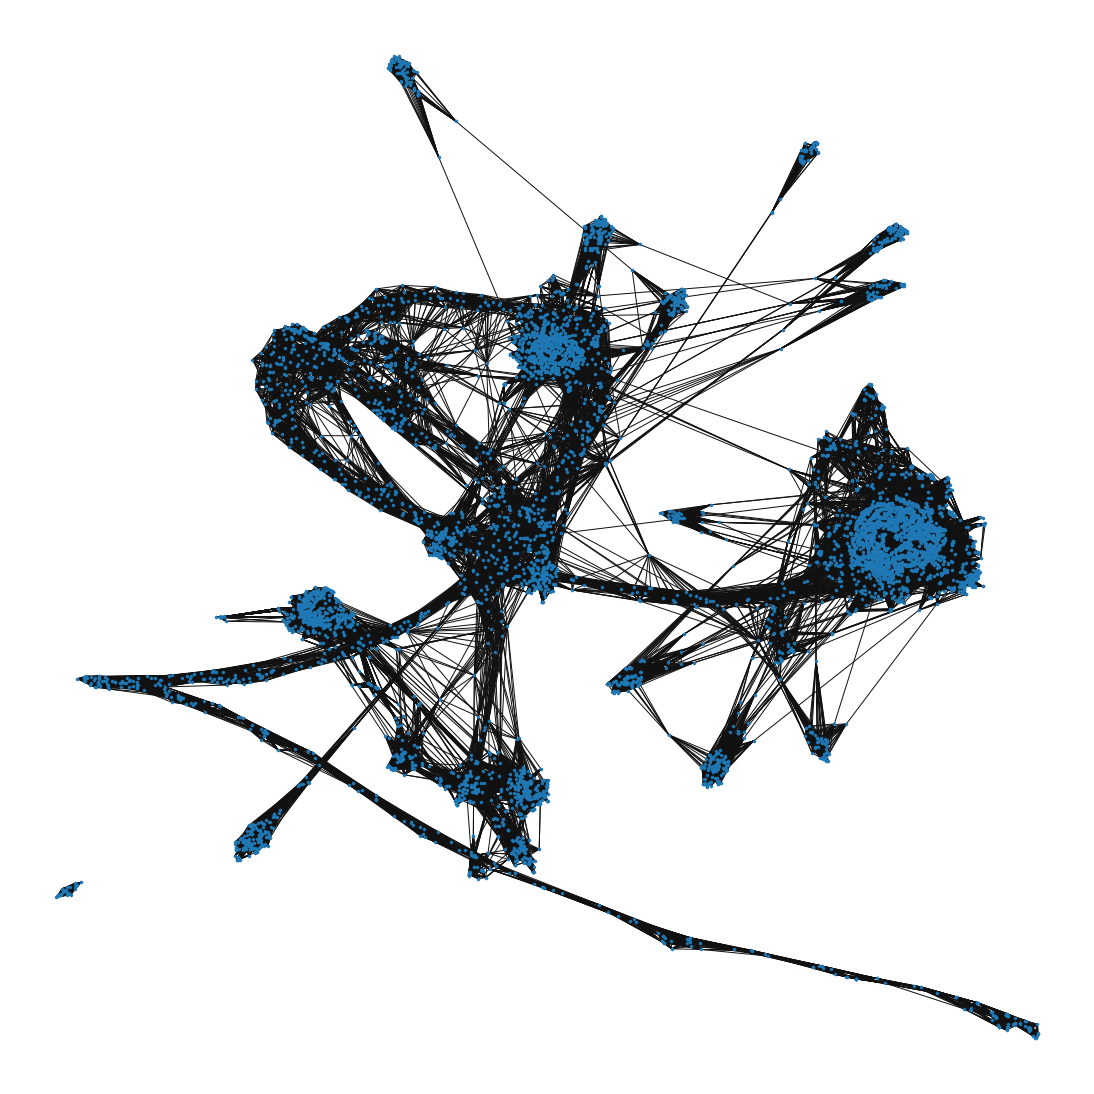

In [130]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(15, 15))
# def show_graph_with_labels(adjacency_matrix, mylabels):
adjacency_matrix = adj_mat[:]
mylabels = int_hosts[:]
rows, cols = np.where(adjacency_matrix == 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
gr.add_edges_from(edges)
nx.draw(gr, node_size=10, labels=mylabels, with_labels=False)
plt.show()

# show_graph_with_labels(adj_mat, (attribute_data))

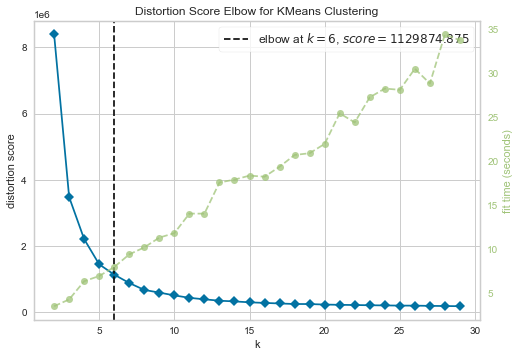

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(seq_data)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

# t-SNE Plot

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt # graphs plotting
import matplotlib.cm as cm
import seaborn as sns

# We embed all our sequences into 2D vectors with help of TSNE
X_embedded_orig = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(seq_data)


C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:550: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


MemoryError: Unable to allocate 25.6 GiB for an array with shape (248084, 13824) and data type float64

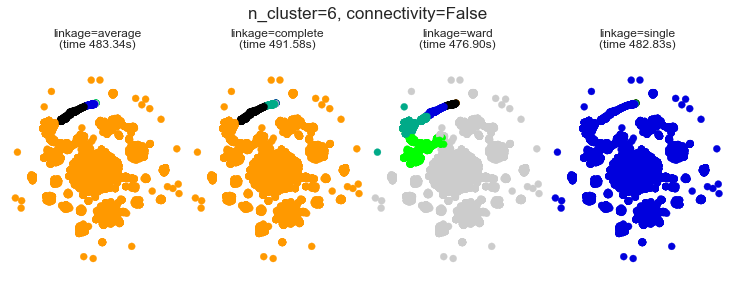

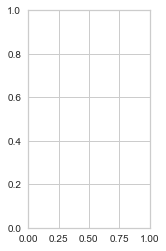

In [12]:
import time
for connectivity in (None, A):
#     for n_clusters in (number_of_NN, 3):
    n_clusters = 6
    plt.figure(figsize=(10, 4))
    for index, linkage in enumerate(("average", "complete", "ward", "single")):
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(
            linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
        )
        t0 = time.time()
        model.fit(seq_data)
        elapsed_time = time.time() - t0
        plt.scatter(X_embedded_orig[:, 0], X_embedded_orig[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
        plt.title(
            "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
            fontdict=dict(verticalalignment="top"),
        )
        plt.axis("equal")
        plt.axis("off")

        plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
        plt.suptitle(
            "n_cluster=%i, connectivity=%r"
            % (n_clusters, connectivity is not None),
            size=17,
        )


plt.show()
plt.savefig('agglomorative_connectivity.png')

# Clustering Comparison

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(


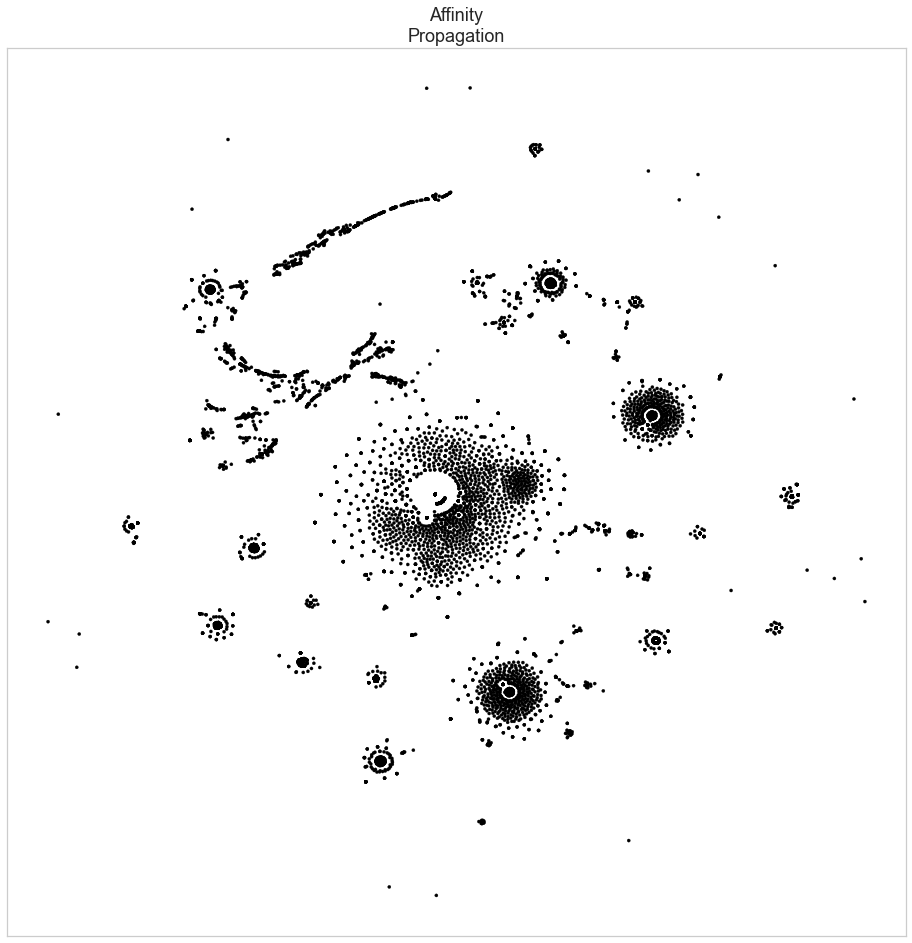

OSError: [Errno 22] Invalid argument: 'E:/University/3rd Semester/Graph Mining/Project/Plots/cluster_comparison/clusters_comparison_Affinity\nPropagation.png'

<Figure size 576x396 with 0 Axes>

In [171]:
import warnings


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
# n_samples = 1500
# noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

noisy_circles = seq_data[:]
x_low_dim = X_embedded_orig[:]


# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(13, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 6,
            "min_samples": 20,
            "xi": 0.25,
        },
    )
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

#     X, y = dataset
    X = dataset[:]

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
#         ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
#         ("MeanShift", ms),
#         ("Spectral\nClustering", spectral),
#         ("Ward", ward),
#         ("Agglomerative\nClustering", average_linkage),
#         ("DBSCAN", dbscan),
#         ("OPTICS", optics),
#         ("BIRCH", birch),
#         ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        #plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(x_low_dim[:, 0], x_low_dim[:, 1], s=10, color=colors[y_pred])

#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
#         plt.text(
#             0.99,
#             0.01,
#             ("%.2fs" % (t1 - t0)).lstrip("0"),
#             transform=plt.gca().transAxes,
#             size=15,
#             horizontalalignment="right",
#         )
        plot_num += 1

plt.show()
plt.savefig('E:/University/3rd Semester/Graph Mining/Project/Plots/cluster_comparison/clusters_comparison_' + str(clustering_algorithms[0][0]) +'.png')

In [170]:
########## Clustering Goodness (start) #####################
score = silhouette_score(seq_data, y_pred, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

calinski_score = calinski_harabasz_score(seq_data, y_pred)
print('calinski Score: %.3f' % calinski_score)

davies_score = davies_bouldin_score(seq_data, y_pred)
print('davies bouldin Score: %.3f' % davies_score)
########## Clustering Goodness (ends) #####################

Silhouetter Score: 0.133
calinski Score: 1505.011
davies bouldin Score: 2.064


In [164]:
len(dataset)

20

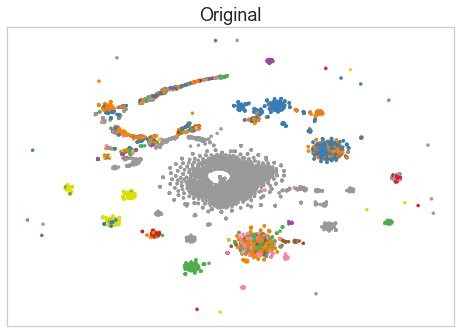

In [152]:
# plt.subplot(1000, len(clustering_algorithms), plot_num)

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(int_hosts) + 1),
                )
            )
        )
colors = np.append(colors, ["#000000"])
plt.scatter(X_embedded_orig[:, 0], X_embedded_orig[:, 1], s=10, color=colors[int_hosts])
plt.title("Original", size=18)
plt.xticks(())
plt.yticks(())
# plt.text(
#     0.99,
#     0.01,
#     ("%.2fs" % (t1 - t0)).lstrip("0"),
#     transform=plt.gca().transAxes,
#     size=15,
#     horizontalalignment="right",
# )
plt.savefig("E:/University/3rd Semester/Graph Mining/Project/Plots/t_SNE_org.png")